# **Udacity Ford GoBikes Analysis**
## **1. Introduction**
Ford GoBike or Bay Wheels (name changed after getting acquired by Lyft) is a bike sharing company in San Fransisco. It has provided data about its trip in the San Fransisco Bay area from 2017 to 2020 that includes the duration of the trip, the coordinates (longitude and latitude) of the trips etc.

Each month's data is in the form of a zipped csv file. The data will be programatically downloaded from the website and a master dataset will be created. This will be cleaned to make it tidy and data exploration will be performed on the dataset.

## **2. Data Gathering**
The data is presenet in zipped format in Lyft's AWS server location. Each month's data is stored as a seperate csv file in zipped folders. The index containing a list of the file names needs to be scraped from the AWS server.

This index will then be used to prgramatically download all the files. They will then be unzipped and read into a Pandas dataframe.

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import zipfile
import io

Scraping the list of all the files from the AWS storage location

In [22]:
# Getting the URL for the zip files from the Lyft/ Ford AWS 
response= requests.get('https://s3.amazonaws.com/baywheels-data')
response

<Response [200]>

Storing the files in the form of an html document which will be read using BeautifulSoup.

In [34]:
# writing the index of file_names into a local file
my_folder= r'C:\Users\srini\Udacity\Udacity Ford GoBike'
my_file= 'index2.html'
with open ( os.path.join(my_folder,my_file), 'wb') as file:
    file.write(response.content)

In [35]:
#opening the HTML file using beautiful soup
with open (os.path.join(my_folder,my_file), 'r') as file:
    soup= BeautifulSoup(file)

Extracting the file name from the index list

In [85]:
#finding all the names of the files in the webpage that need to be downloaded
my_list= [str(i).split('>')[1].split('<')[0] for i in soup.find_all('key')]
my_list[:2]

['2017-fordgobike-tripdata.csv.zip', '201801-fordgobike-tripdata.csv.zip']

Downloading the files present in the index and extracting them to the local drive

In [117]:
# Getting the URL for the zip files from the Lyft/ Ford AWS 
my_url= 'https://s3.amazonaws.com/baywheels-data'

for x in my_list[:-1]:
    my_url_mod= my_url+'/'+x   # create a unique URL for each file
    
    response= requests.get(my_url_mod)   
    
    # Downloading and extracting the zipfile
    z= zipfile.ZipFile(io.BytesIO(response.content))  
    z.extractall(os.path.join(my_folder,str(x[:-4])))  # Giving local hardrive path to store the extracted files

In [154]:
# Specifying the data type for each column in the csv file
my_dtype= {'duration_sec':'int', 'start_time': 'str', 'end_time':'str', 'start_station_id':'float',
       'start_station_name':'str', 'start_station_latitude': 'float',
       'start_station_longitude':'float', 'end_station_id':'float', 'end_station_name':'str',
       'end_station_latitude':'float', 'end_station_longitude':'float', 'bike_id':'int', 'user_type':'str',
       'rental_access_method':'object'}

Using Pandas to read each of the extracted csv files from above and concatenating them to a master dataframe

In [298]:
# Concatenating each csv file into a master dataframe called df
df= pd.read_csv(os.path.join(my_folder, my_list[0][:-4], my_list[0][:-4]))

for x in my_list[:-1]:
    temp= pd.read_csv(os.path.join(my_folder, x[:-4], x[:-4]), dtype= my_dtype) # Making sure that .zip element is removed
    df= pd.concat([df,temp], sort= False, )
df.info()

C:\Users\srini\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6138312 entries, 0 to 432353
Data columns (total 15 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
rental_access_method       object
dtypes: float64(6), int64(2), object(7)
memory usage: 749.3+ MB


In [299]:
df.shape

(6138312, 15)

There are a total of 12 million rows in the dataset that contains all the ride data made by Ford GoBike from 2017 to 2020.

Exporting the master dataframe to local drive so that it can be accessed easily later.

In [300]:
# Exporting the combined master dataframe to local hard drive
df.to_csv(os.path.join(my_folder,'master.csv'),index=False )

## 3. Data Assessing and Cleaning
The gathered data has a few quality and tidiness issues that need to be cleaned.

In [301]:
# Making a copy of the master dataframe
df_copy = df.copy()

In [302]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN,NaN


**1. Duplicate Index** <br>
**Assessment:** Since we concatenated the data, lots of rows have duplicate index.<br>
**Cleaning:** Remove these duplicate index so that each observation has a unique index.

In [307]:
# resetting the duplicate index
df.reset_index(inplace= True)

# checking for the duplicate
df.index.duplicated().sum()

# dropping the index column
df.drop(columns='index', inplace= True)
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,NaN


**2. Duplicate rows**

Assessment: There are around half million duplicate rows in the dataset

In [310]:
#checking for duplicates in the dataframe
df.duplicated().sum()

519700

In [311]:
df[df.duplicated()].head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
519700,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,NaN
519701,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN,NaN
519702,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN


In [312]:
# Dropping the duplicate rows
df.drop_duplicates(inplace= True)

#checking the operation
df.duplicated().sum()

0

In [314]:
# Finding more missing values in the columns as df.info is not providing the information

df.duration_sec.isna().sum() # no misisng values
df.start_station_id.isna().sum() # there are 7 million missing rows of data for the starting station
df.end_station_id.isna().sum() #there are also 7 million missing rows of data for the ending station
df.start_station_latitude.isna().sum()

0

In [315]:
df.user_type.value_counts()

Subscriber    4462384
Customer      1156228
Name: user_type, dtype: int64

**3. Changing the start_time and end_time columns to datetime format in Python.**

In [316]:
# Changing the start time to DateTime format
df.start_time= pd.to_datetime(df.start_time)

In [317]:
# Changing the end time to DateTime format
df.end_time = pd.to_datetime(df.end_time)

In [318]:
# Adding a duration in min column for better analysis later on
df['duration_min']= df.duration_sec/60

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5618612 entries, 0 to 6138311
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
rental_access_method       object
duration_min               float64
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory usage: 728.7+ MB


The data is tidy as each category has its own column, each observation has its own row and together they form a table.

In [321]:
# checking for any incorrect categories that might have creeped in
df.rental_access_method.value_counts()

app        572966
clipper     51461
Name: rental_access_method, dtype: int64

In [181]:
# checking for any incorrect categories that might have creeped in
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [322]:
df['duration_min'].describe()

count    5.618612e+06
mean     1.415387e+01
std      3.754154e+01
min      1.000000e+00
25%      5.983333e+00
50%      9.516667e+00
75%      1.485000e+01
max      1.520183e+04
Name: duration_min, dtype: float64

In [323]:
df.start_station_id.nunique()

458

**4. Adding seperate columns for Year, Month, Hour for analysis later on**

In [324]:
#Extracting the  year, month and hour information 
df['year']= df.start_time.dt.year
df['month']= df.start_time.dt.month
df['hour']= df.start_time.dt.hour

# Extracting the day of the week information
df['weekday']=df.start_time.dt.weekday

df.weekday.replace({0:'Mon',1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'},inplace= True )
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,duration_min,year,month,hour,weekday
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,NaN,1335.166667,2017,12,16,Sun


In [ ]:
# Merging the year and month columns to find better time series trends
df['year_month']= df.year.map(str)+'-'+df.month.map(str)

# Merging the year and month columns for easier analysis
df['year_month']= pd.to_datetime(df['year_month'], format='%Y-%m').dt.strftime('%Y-%m')

In [687]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,rental_access_method,duration_min,year,month,hour,weekday,year_month,ride
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Customer,NaN,NaN,1335.166667,2017,12,16,Sun,2017-12,1


In [688]:
# Exporting the clean dataset to local drive
df.to_csv(os.path.join(my_folder,'master_clean.csv'),index=False )

In [3]:
# importing the file in case we are running the Jupyter notebook again rather than redownloading the data.
my_folder= r'C:\Users\srini\Udacity\Udacity Ford GoBike'
df= pd.read_csv(os.path.join(my_folder,'master_clean.csv'))

C:\Users\srini\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


There do not seem to be any other major quality issues with the data and we will proceed to perform EDA and visualization.

## 4. Data Visualization
The key columns for interest for us are the duration (in min) column, the start time and end time of the rides. The rides in each year, hour and weekday and the starting and ending stations to see which stations are busy.

**4.1 Histogram for ride duration** <br>
We need to see the distribution of the duration column to understand how long people ride

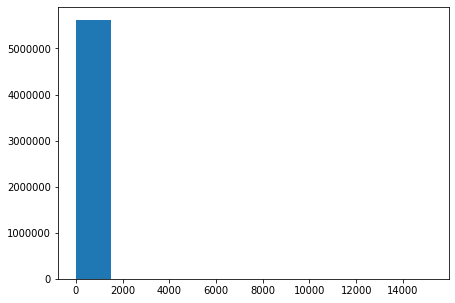

In [4]:
# plotting the histogram for duration_min column
plt.figure(figsize= [7,5])
plt.hist(df.duration_min)

plt.show()

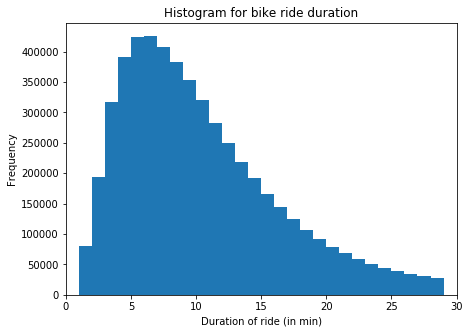

In [534]:
# plotting the histogram for duration_min column
plt.figure(figsize= [7,5])
plt.hist(df.duration_min, bins= np.arange(0,30,1))
plt.xlim((0,30))
plt.xlabel('Duration of ride (in min)')
plt.ylabel('Frequency')
plt.title('Histogram for bike ride duration')
plt.show()

The distribution for the duration of bike ride seems to be a right shaped distribution with mode between 5 and 10 min. Hence most of our riders are short distance riders. The historgram has been clipped at 30 min as rides above that are very rare.

**4.2 Busiest Stations**

We need to identify if particular starting station are more busy than others and if some destinations are busier than others.

In [561]:
# Total days for which we have data for
print('Total number of days in analysis ',df.start_time.dt.date.max()- df.start_time.dt.date.min())
total_days= 977

Total number of days in analysis  977 days, 0:00:00


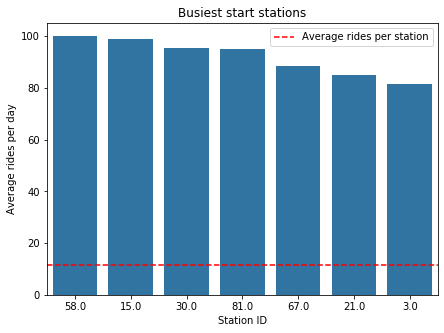

In [556]:
# Calculating the busiest station based on average rides per day
plt.figure(figsize= [7,5])
busy_station= (df.start_station_id.value_counts().head(7))/ 977  # dividing by total days for our data to calculate mean
avg_station_rides = (df.start_station_id.value_counts()/977).mean()

sns.barplot(x= busy_station.index, y= busy_station, color= sns.color_palette()[0], order= busy_station.index )
plt.axhline(avg_station_rides,color='r', linestyle= '--', label= 'Average rides per station' )
plt.ylabel('Average rides per day')
plt.xlabel('Station ID')
plt.title('Busiest start stations')
plt.legend()
plt.show()

The busiest stations have an average of around 80 to 100 rides originating from them. These stations have average rides much higher than the normal, this shows that several stations have very few rides associated with them. We will explore them more in later multivariate exploration.

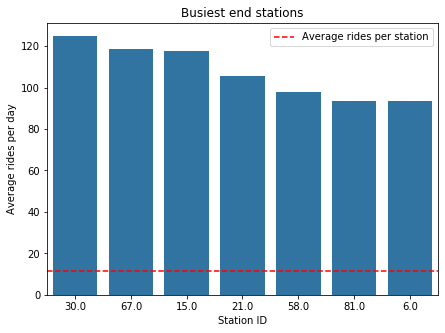

In [559]:
# Calculating the busiest destination based on average rides per day
plt.figure(figsize= [7,5])
busy_station= (df.end_station_id.value_counts().head(7))/ 977
avg_station_rides_end = (df.end_station_id.value_counts()/977).mean()

sns.barplot(x= busy_station.index, y= busy_station, color= sns.color_palette()[0], order= busy_station.index )
plt.axhline(avg_station_rides_end,color='r', linestyle= '--', label= 'Average rides per station' )

plt.ylabel('Average rides per day')
plt.xlabel('Station ID')
plt.title('Busiest end stations')
plt.legend()
plt.show()

The busiest destination have around 120 rides ending on them per day. These stations have average rides much higher than the normal, this shows that several stations have very few rides associated with them. We will explore them more in later multivariate exploration.

**4.3 Number of rides per week day** <br>
We will try to explore if there is any relationship between week days (like Monday, Tuesday etc.) with number of rides.

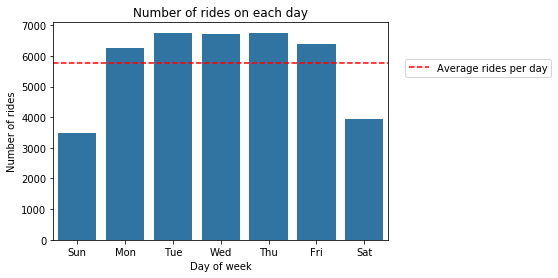

In [579]:
# Grouping the number of rides based on weekday
temp = df.groupby(by='weekday').count()['duration_sec']/ (total_days/7) # Number of times Sunday came in 3 years preiod
avg_ride_per_day = df.shape[0]/ total_days

# Visualizing the number of rides based on weekday
day_order= 'Sun,Mon,Tue,Wed,Thu,Fri,Sat'.split(',')
sns.barplot(x=temp.index, y=temp.values,color= sns.color_palette()[0],order= day_order)
plt.axhline(avg_ride_per_day,color= 'r',linestyle= '--', label= 'Average rides per day')

plt.title('Number of rides on each day')
plt.xlabel('Day of week')
plt.ylabel('Number of rides')
plt.legend(loc=(1.05,0.75))
plt.show()

As can be seen from the above boxplot, the least number of rides are during weekends. We need to compare it with the duration of the rides.

**4.4 Duration of the rides per weekday** <br>
We will try to explore if there is any relationship between week days (like Monday, Tuesday etc.) with duration of rides.

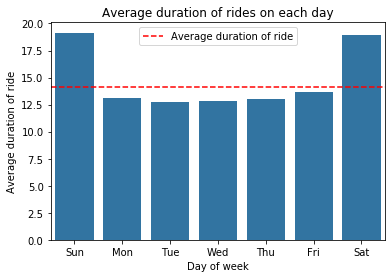

In [580]:
# Visualizing the average duration of rides based on weekday

temp2 = df.groupby(by='weekday').mean()['duration_min']
avg_dur= df.duration_min.mean()

sns.barplot(x=temp2.index, y=temp2.values,color= sns.color_palette()[0],order= day_order)
plt.axhline(avg_dur_per_day, color= 'r',linestyle= '--', label= 'Average duration of ride')
plt.title('Average duration of rides on each day')
plt.xlabel('Day of week')
plt.ylabel('Average duration of ride')
plt.legend()
plt.show()

Even though the number of rides are less on the weekends, the duration of the rides are on an average 6 min longer on weekends. A boxplot can help us better to understand this relationship.

(0, 30)

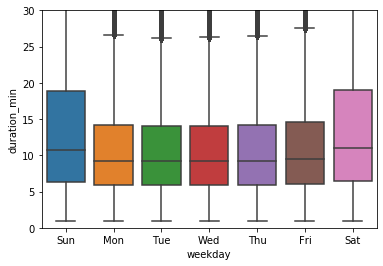

In [330]:
#Boxplot for the relation between different week days and duration of rides
sns.boxplot(x= df.weekday, y=df.duration_min, order= day_order)
plt.ylim((0,30))

It is clear from the above plots that people generally ride longer on the weekends. The medians of both Saturday and Sunday are higher compared to the weekdays.

**4.5 Average duration of rides based on the time of day**

In each day there might different hours where there is different number of rides. We will try to explore this relationship.

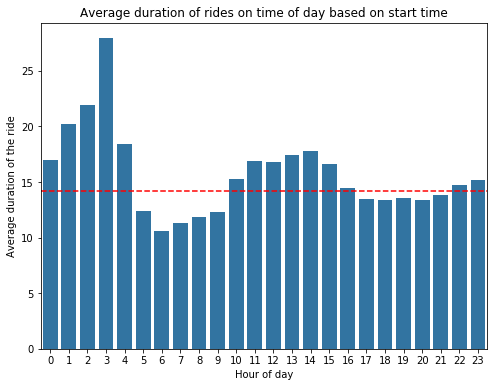

In [581]:
# Visualizing the number of rides based on hourly basis
plt.figure(figsize=[8,6])
temp2 = df.groupby(by='hour').mean()['duration_min']
avg_duration = df.duration_min.mean()

sns.barplot(x=temp2.index, y=temp2.values,color= sns.color_palette()[0])
plt.axhline(avg_duration, color='r', linestyle= '--', label= 'Average ride duration')

plt.title('Average duration of rides on time of day based on start time')
plt.xlabel('Hour of day')
plt.ylabel('Average duration of the ride')
plt.show()

This shows that on an average the longest duration of cycle rides are between 1am to 4am. This seems counterintuitive. We need to explore the number of rides data to dig deeper.

**4.6 Average number of rides on a given time of the day**

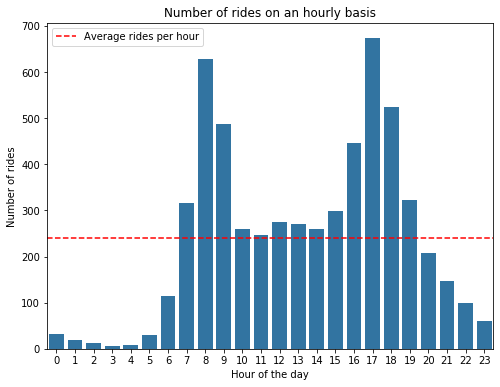

In [586]:
# grouping the data on hourly basis
temp= df.groupby(by='hour').count()['start_time']/ (total_days)
avg_rides_hour = df.shape[0]/(total_days*24)

# Number of rides vs hour of day data
plt.figure(figsize=[8,6])
sns.barplot(x=temp.index, y=temp,color= sns.color_palette()[0])
plt.axhline(avg_rides_hour, color='r', linestyle= '--', label= 'Average rides per hour')

plt.ylabel('Number of rides')
plt.xlabel('Hour of the day')
plt.title('Number of rides on an hourly basis')
plt.legend()
plt.show()

This shows that even though the duration of the rides is very long over the weekends, the number of rides are less.

We need to explore if this trend is similar for every week day to see if there are any interactions in this behaviour.

**4.7 Number of rides on an hourly basis on each weekday** <br>
Plotting the average number of rides for each hour for each weekday to see if there is any relationship between the 3 features.

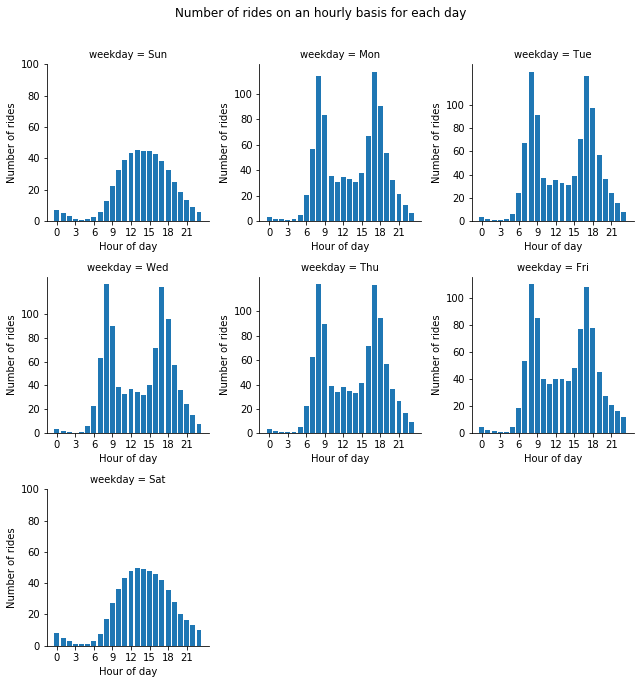

In [605]:
# Seeing the interaction between the number of rides and hour depending on the day of the week
temp2 = (df.groupby(by=['weekday','hour']).count()['duration_min']/total_days).reset_index()

g= sns.FacetGrid(temp2, col='weekday', col_wrap= 3, col_order= day_order, sharex= False, sharey= False  )
g.map(plt.bar, 'hour','duration_min' )
g.set(xticks=np.arange(0,24,3), ylabel= 'Number of rides', xlabel='Hour of day', yticks= np.arange(0,120,20))

g.fig.suptitle('Number of rides on an hourly basis for each day', y=1.05)
plt.tight_layout()
plt.show()

This clearly shows the spike in users between 6am and 9am in the morning and 4pm to 6pm in the evening over the weekdays. On weekends there are no such spikes. On weekends the demand is less and the curve is more gentle.

**4.8 Growth in GoBikes ridership**

Finding the change in the number of rides from 2017 to 2020 on a monthly basis.

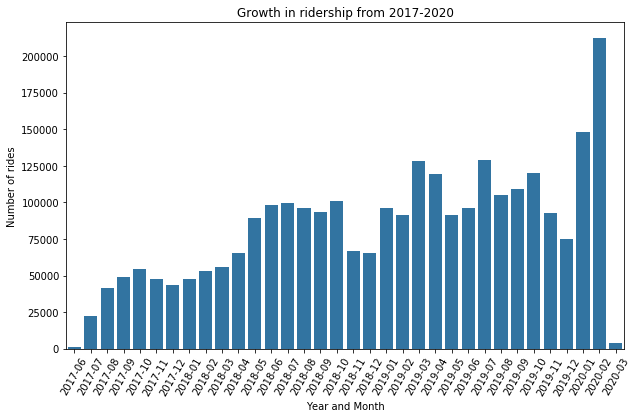

In [608]:
# change in the number of rides from 2017 to 2020 on a monthly basis.
temp = df.groupby(by=['year_month', 'user_type']).count()['start_time'].reset_index()
temp.head()

# Visualizing the growth in rides on a monthly basis
plt.figure(figsize= [10,6])
sns.barplot(x= temp['year_month'], y= temp.start_time, color= sns.color_palette()[0], ci=None)

plt.xticks(rotation= 60)
plt.ylabel('Number of rides')
plt.xlabel('Year and Month')
plt.title('Growth in ridership from 2017-2020')
plt.show()

This shows an incresing trends for the bike rides from 2017 onwards. Feb 2020 shows a remarkable spurt in growth in the number of rides.

**4.9 Growth in GoBike ridership based on type of user** <br>
We need to explore if there is a particular category of the user that has grown more over time.

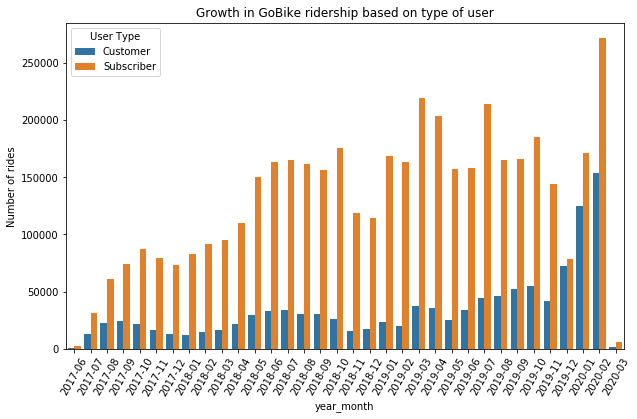

In [609]:
# Visualizing the growth in rides on a monthly basis split by user type
plt.figure(figsize= [10,6])
sns.barplot(x= temp['year_month'], y= temp.start_time, hue= temp['user_type'])
plt.xticks(rotation= 60)
plt.ylabel('Number of rides')
plt.title('Growth in ridership from 2017-2020')
plt.legend(title='User Type')
plt.title('Growth in GoBike ridership based on type of user')
plt.show()

From the above graph one can see that the growth in subscriber is much more prominent compared to the growth in customer user type.The growth in subscriber base has grown from 100,000 to 250,000 in less than 2 years.

**4.10 Hourly ridership data based on user type** <br>
Since subscriber base has grown a lot we need to see if they have the same behaviour on an hourly basis.

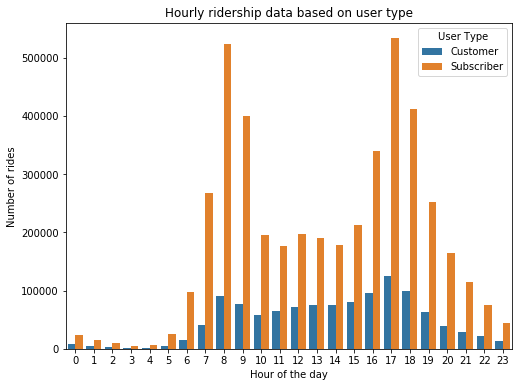

In [610]:
# grouping the data on hourly basis split by usertype
temp= df.groupby(by=['hour', 'user_type']).count()['start_time'].reset_index()

# Number of rides vs hour of day data
plt.figure(figsize= [8,6])
sns.barplot(x=temp.hour, y=temp.start_time,hue= temp.user_type )
plt.ylabel('Number of rides')
plt.xlabel('Hour of the day')
plt.legend(title='User Type')
plt.title('Hourly ridership data based on user type')
plt.show()

The number of subscribers travelling during office hours (7am to 10am and 4pm to 7pm) is very high compared to the customer category riders. However, both users show similar type of spikes in timings.

**4.11 Growth in ridership based on rental access method** <br>
We need to explore the growth in rental access methods over time. There is lot of missing data and the data is available only since June 2019.

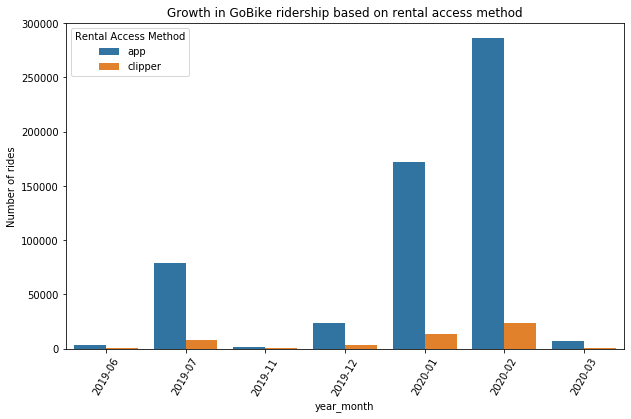

In [669]:
# Visualizing the growth in rides on a monthly basis split by rental access method
temp = df.groupby(by=['year_month', 'rental_access_method']).count()['start_time'].reset_index()
temp.head()

plt.figure(figsize= [10,6])
sns.barplot(x= temp['year_month'], y= temp.start_time, hue= temp['rental_access_method'])
plt.xticks(rotation= 60)
plt.ylabel('Number of rides')
plt.title('Growth in ridership from 2017-2020')
plt.legend( title='Rental Access Method' )
plt.title('Growth in GoBike ridership based on rental access method')
plt.show()

There seems to be a lot of missing data for the rental access method column. However,the clipper card doesnt seem to be a very popular choice for using GoBikes and doesn't show much increase in growth. However, the app seems to be growing at a steady pace apart from the 2 winter months of November and Decemeber.

**4.12 Heatmap depiciting the busy hours for each station** <br>
We need to explore which stations are the busiest and at what time. This will help us to understand how many bikes should be kept in each station so that the customer can be served properly.

In [622]:
# Counting the average rides each hour from each station
df_pivot = df.pivot_table(values='ride', index='start_station_id', columns= 'hour', aggfunc=np.sum)/ (total_days)
df_pivot.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start_station_id,,,,,,,,,,,,,,,,,,,,,
3.0,0.361310,0.204708,0.098260,0.060389,0.034800,0.299898,0.579324,1.154555,5.068577,5.460594,...,4.540430,4.807574,6.494371,11.798362,9.799386,5.797339,3.932446,2.550665,1.398158,0.673490
4.0,0.156602,0.079836,0.074719,0.037871,0.027636,0.071648,0.498465,0.868987,1.561924,1.419652,...,0.727738,0.839304,0.967247,1.293756,1.251791,0.868987,0.691914,0.705220,0.559877,0.289662
5.0,0.413511,0.250768,0.159672,0.096213,0.098260,0.253838,1.223132,2.116684,5.476970,5.974411,...,3.178096,3.745138,5.078813,8.320368,7.195496,4.604913,3.350051,2.237462,1.435005,0.752303
6.0,0.177073,0.088025,0.038895,0.031730,0.024565,0.098260,1.066530,2.805527,5.287615,5.100307,...,4.494371,6.199591,10.370522,12.223132,7.192426,3.796315,2.299898,1.531218,0.829069,0.445241
7.0,0.191402,0.090072,0.053224,0.010235,0.006141,0.014330,0.225179,0.177073,0.408393,0.519959,...,1.161720,1.455476,2.465711,4.734903,3.214944,1.822927,1.328557,0.814739,0.513818,0.340839


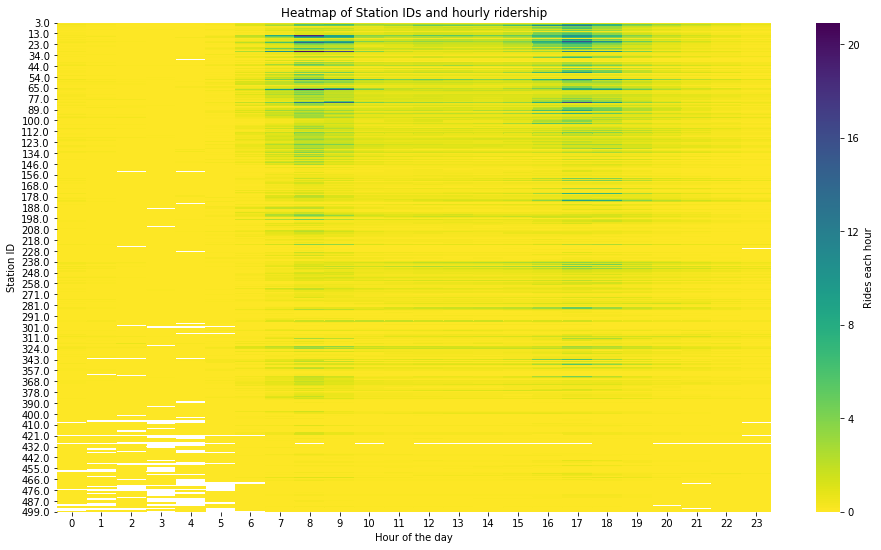

In [662]:
# Plotting a heatmap that shows which stations are busy at which hour
# Since there are 450+ unique station ids, the heatmap wont be a good fit to identify each station
plt.figure(figsize=[16,9])
sns.heatmap(df_pivot, vmin=0, cmap= 'viridis_r', cbar_kws={'label':'Rides each hour'})
plt.title('Heatmap of Station IDs and hourly ridership')
plt.xlabel('Hour of the day')
plt.ylabel('Station ID')
plt.show()

Based on the above heatmap we can see that not all stations are equally busy during the weekdays. To ensure maximum revenue we need to make sure that those particular stations always have sufficient number of bikes during the busy time hours.

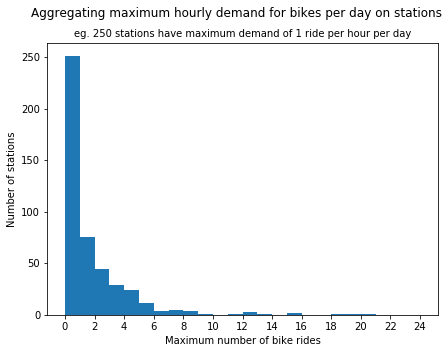

In [679]:
# Summarizing the above heatmap to find how many stations have have how  much of an hourly demand for the bikes
plt.figure(figsize= [7,5])

plt.hist(df_pivot.max(axis=1), bins= np.arange(0,25,1))
plt.xticks(np.arange(0,25,2), np.arange(0,25,2))
plt.xlabel('Maximum number of bike rides')
plt.ylabel('Number of stations')
plt.title('eg. 250 stations have maximum demand of 1 ride per hour per day', {'fontsize':10} )
plt.suptitle('Aggregating maximum hourly demand for bikes per day on stations')
plt.show()

The above histogram shows that 200 stations need just 1 bike on them to satisfy the average peak in customer demand.  Around 75 stations need 2 bikes, while few stations need 15+ bikes on them to satisfy the peak customer demand. This peak customer demand happens during office hours from 7am to 10am and 4pm to 7pm.